In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/train_data.csv')
df.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,5326,1.933,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,4647,2.347,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,102843,11.824,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,7665,3.519,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe().style.background_gradient(cmap='summer')

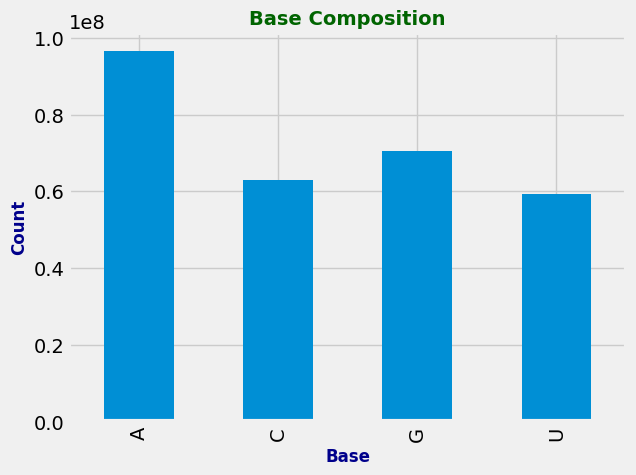

In [4]:
base_counts = df['sequence'].apply(lambda x: pd.Series(list(x)).value_counts()).sum()
base_counts.plot(kind='bar')
plt.xlabel('Base', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Base Composition', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Base Composition.png')

# Show the plot
plt.show()

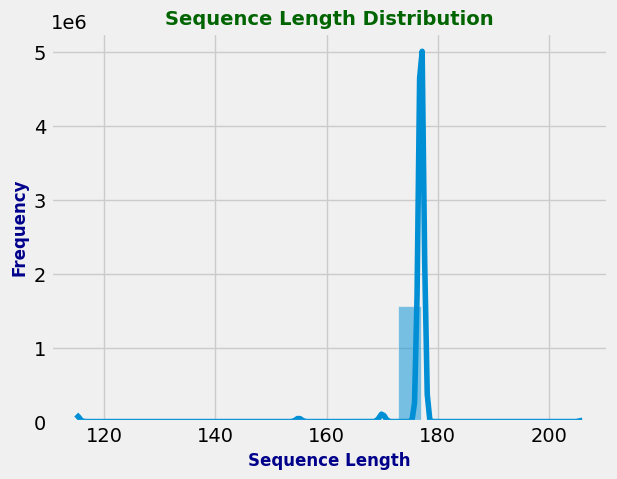

In [5]:
sequence_lengths = df['sequence'].apply(len)
sns.histplot(sequence_lengths, kde=True)
plt.xlabel('Sequence Length', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Sequence Length Distribution', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Sequence Length Distribution.png')

# Show the plot
plt.show()

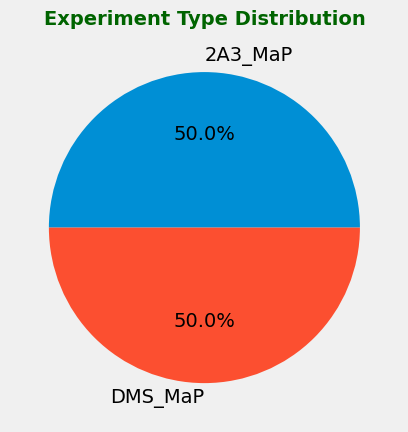

In [6]:
experiment_type_counts = df['experiment_type'].value_counts()
plt.pie(experiment_type_counts, labels=experiment_type_counts.index, autopct='%1.1f%%')
plt.title('Experiment Type Distribution', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Experiment Type Distribution.png')

# Show the plot
plt.show()

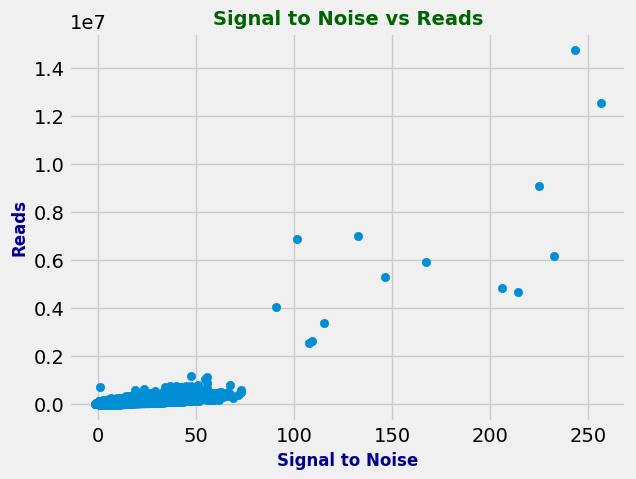

In [7]:
plt.scatter(df['signal_to_noise'], df['reads'])
plt.xlabel('Signal to Noise', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Reads', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Signal to Noise vs Reads', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Signal to Noise vs Reads.png')

# Show the plot
plt.show()

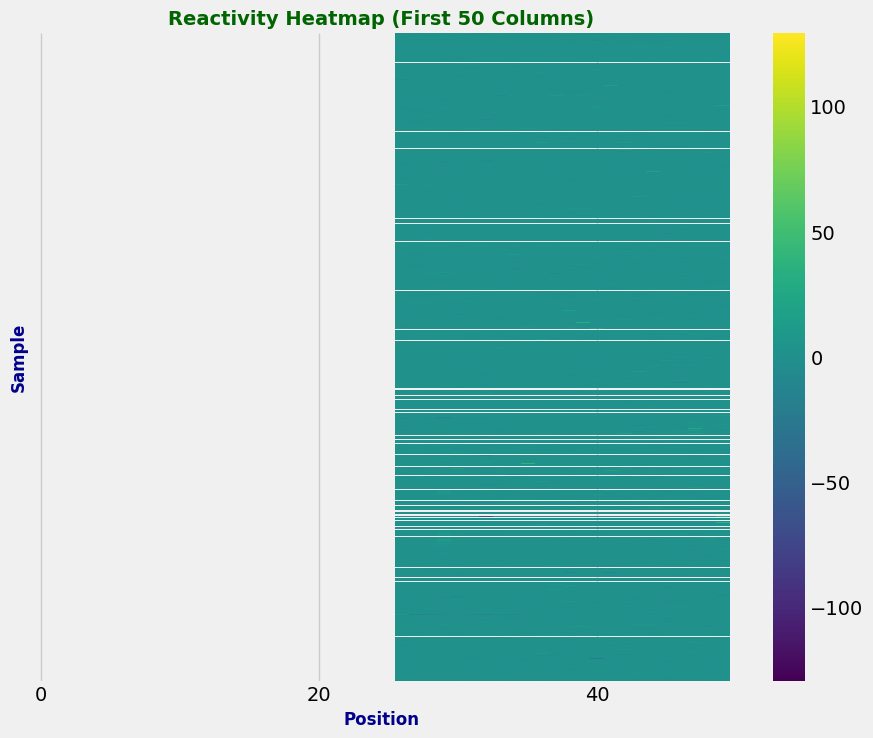

In [8]:
# Select only the first 50 reactivity columns
reactivity_columns = [col for col in df.columns if col.startswith('reactivity')][:50]
reactivity_data = df[reactivity_columns]

# Convert the reactivity data to a numpy array
reactivity_array = reactivity_data.values

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(reactivity_array, cmap='viridis', cbar=True, xticklabels=20, yticklabels=False)
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Sample', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Reactivity Heatmap (First 50 Columns)', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Reactivity Heatmap (First 50 Columns).png')

# Show the plot
plt.show()

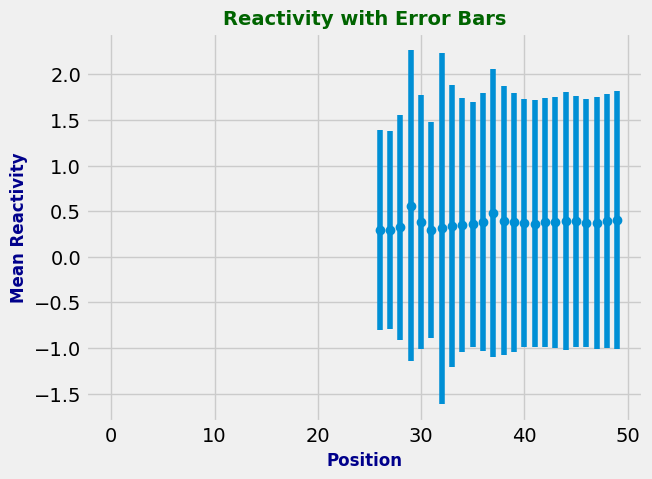

In [9]:
mean_reactivity = reactivity_data.mean(axis=0)
std_reactivity = reactivity_data.std(axis=0)

x = np.arange(len(mean_reactivity))
plt.errorbar(x, mean_reactivity, yerr=std_reactivity, fmt='o')
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Mean Reactivity', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Reactivity with Error Bars', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Reactivity with Error Bars.png')

# Show the plot
plt.show()


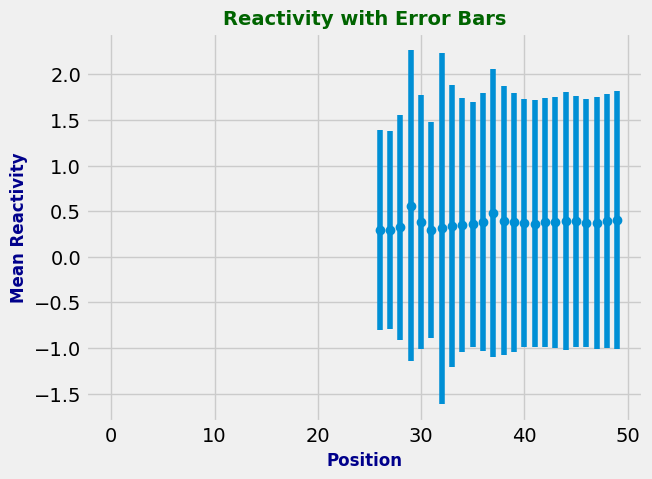

In [10]:
mean_reactivity = reactivity_data.mean(axis=0)
std_reactivity = reactivity_data.std(axis=0)

x = np.arange(len(mean_reactivity))
plt.errorbar(x, mean_reactivity, yerr=std_reactivity, fmt='o')
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Mean Reactivity', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.title('Reactivity with Error Bars', fontsize = 14, fontweight = 'bold', color = 'darkgreen')

# Save the plot
plt.savefig('Reactivity with Error Bars.png')

# Show the plot
plt.show()

In [11]:
def sensitivity(true_positives, false_negatives):
    return true_positives / (true_positives + false_negatives)

true_positives = 100  
false_negatives = 20  

print(f"True Positives: {true_positives}")
print(f"False Negatives: {false_negatives}")

sensitivity_score = sensitivity(true_positives, false_negatives)
print(f"Sensitivity: {sensitivity_score}")

True Positives: 100
False Negatives: 20
Sensitivity: 0.8333333333333334


In [12]:
def ppv(true_positives, false_positives):
    return true_positives / (true_positives + false_positives)

true_positives = 100  
false_positives = 30  

ppv_score = ppv(true_positives, false_positives)
print(f"Positive Predictive Value (PPV): {ppv_score}")

Positive Predictive Value (PPV): 0.7692307692307693


In [13]:
def mcc(true_positives, true_negatives, false_positives, false_negatives):
    numerator = (true_positives * true_negatives) - (false_positives * false_negatives)
    denominator = ((true_positives + false_positives) * (true_positives + false_negatives) * 
                   (true_negatives + false_positives) * (true_negatives + false_negatives)) ** 0.5
    return numerator / denominator if denominator != 0 else 0


true_positives = 100  
true_negatives = 50   
false_positives = 30  
false_negatives = 20  

mcc_score = mcc(true_positives, true_negatives, false_positives, false_negatives)
print(f"Matthews Correlation Coefficient (MCC): {mcc_score}")


Matthews Correlation Coefficient (MCC): 0.4707565417620042


In [14]:
def f_measure(true_positives, false_positives, false_negatives):
    precision = ppv(true_positives, false_positives)
    recall = sensitivity(true_positives, false_negatives)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

true_positives = 100  
false_positives = 30  
false_negatives = 20  

f_measure_score = f_measure(true_positives, false_positives, false_negatives)
print(f"F-measure (F1 Score): {f_measure_score}")

F-measure (F1 Score): 0.8


In [15]:
%%capture
%pip install arnie

In [16]:
%%capture
%pip install draw_rna

In [17]:
# install eternafold
!conda config --set auto_update_conda false
!conda install -c bioconda eternafold --yes

Retrieving notices: ...working... done
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

In [18]:
%env ETERNAFOLD_PATH=/opt/conda/bin/eternafold-bin
%env ETERNAFOLD_PARAMETERS=/opt/conda/lib/eternafold-lib/parameters/EternaFoldParams.v1

env: ETERNAFOLD_PATH=/opt/conda/bin/eternafold-bin
env: ETERNAFOLD_PARAMETERS=/opt/conda/lib/eternafold-lib/parameters/EternaFoldParams.v1


In [19]:
#  df is your DataFrame
sequences = df['sequence'].tolist()
#sequences

In [20]:
from arnie.mfe import mfe
sequence ="GGGAACGACUCGAGUAGAGUCGAAAACGUACGUGGAGACACGUACGACGAGACUUCGGUCUCGAAUAGCUCGAACCGGUGCCGAGCGCGCACGAGGCGUCGGUGGUCGGCGAGCCCACGGACGCAAAAACUCGUGCGUAAAUAAAUAGCAUUGGAAGUGACGUCGACCGUUCGCGGUCGACGUCACAAAAGAAACAACAACAACAAC"
structure = mfe(sequence,package="eternafold")
print(structure)

.....((((((.....))))))....((((((((....)))))))).((((((....))))))....(((((..(....).)))))((((((((((((((.((((.(.....).)))).))))).....)))))))))..................(((((((((((((....))))))))))))).....................


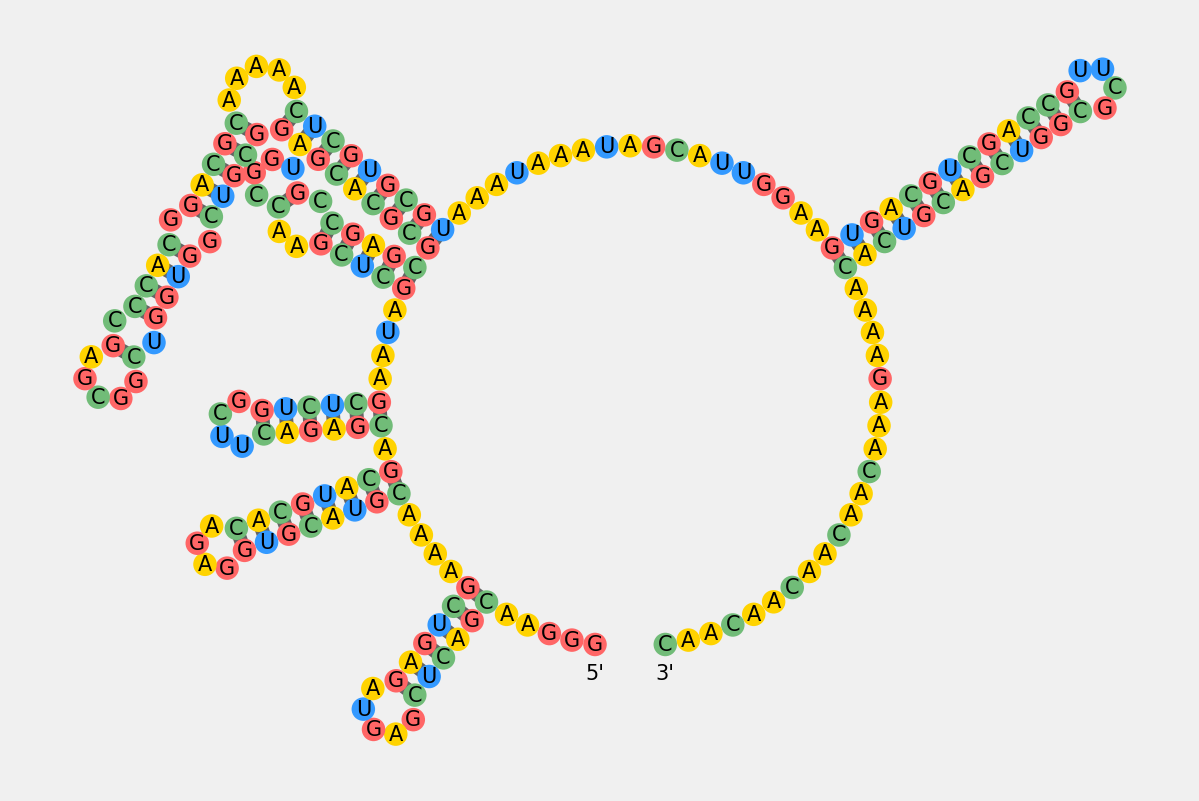

In [21]:
from draw_rna.ipynb_draw import draw_struct
draw_struct(sequence, structure)

In [22]:
from arnie.mfe import mfe
sequence = "GGGAACGACTCGAGTAGAGTCGAAAAATAAGAGTGATTGGCGTCCGTACGTACCCTTTCTACTCTCAAACTCTTGTTAGTTTAAATCTAATCTAAACTTTATAAACGGCACTTCCTGTGTGTCCATGCCCGTGGGCTTGGTCTTGTCATAGTGCTGACATTTGTGGTTCCTTGGTTTTTGTTCTCTGCCAGTGACGTGTCCATTCGGCGCCAGCAGCCCACCCATAGGTTGCATAATGGCAAAGATGGGCAAATACGGTCTCGGCTTCAAATGGGCCCCAGAATTTCCATGGATGCTTCCGAACGCATCGGAGAAGTTGGGTAGCCCTGAGAGGTCAGAGGAGGATGGGTTTTGCCCCTCTGCTGCGCAAGAACCAAAAACTAAAGGAAAAACTTTGATTAATCACGTGAGGGTGGGGATCCTGTTCGCAGGATCCAAAAGAAACAACAACAACAAC"
structure = mfe(sequence,package="eternafold")
print(structure)

.....((((((.....)))))).......(((((((..(((((....)))...))..)).)))))............((((((.........)))))).......(((((((...((...(.(((.(((....))).))).)....)).)))))))......((..((((((((((((((((((.(((((((((((((((((.((...((((((((((........))))))....))))...))))))))....)).)(((((((((....(((((((((..(((((...(((((........))))))))))..)))))..))))...)))))).)))(((...(((.....))))))))))).)))))))).))))))).))))))..))..........(((......))).((((((((....)))))))).....................


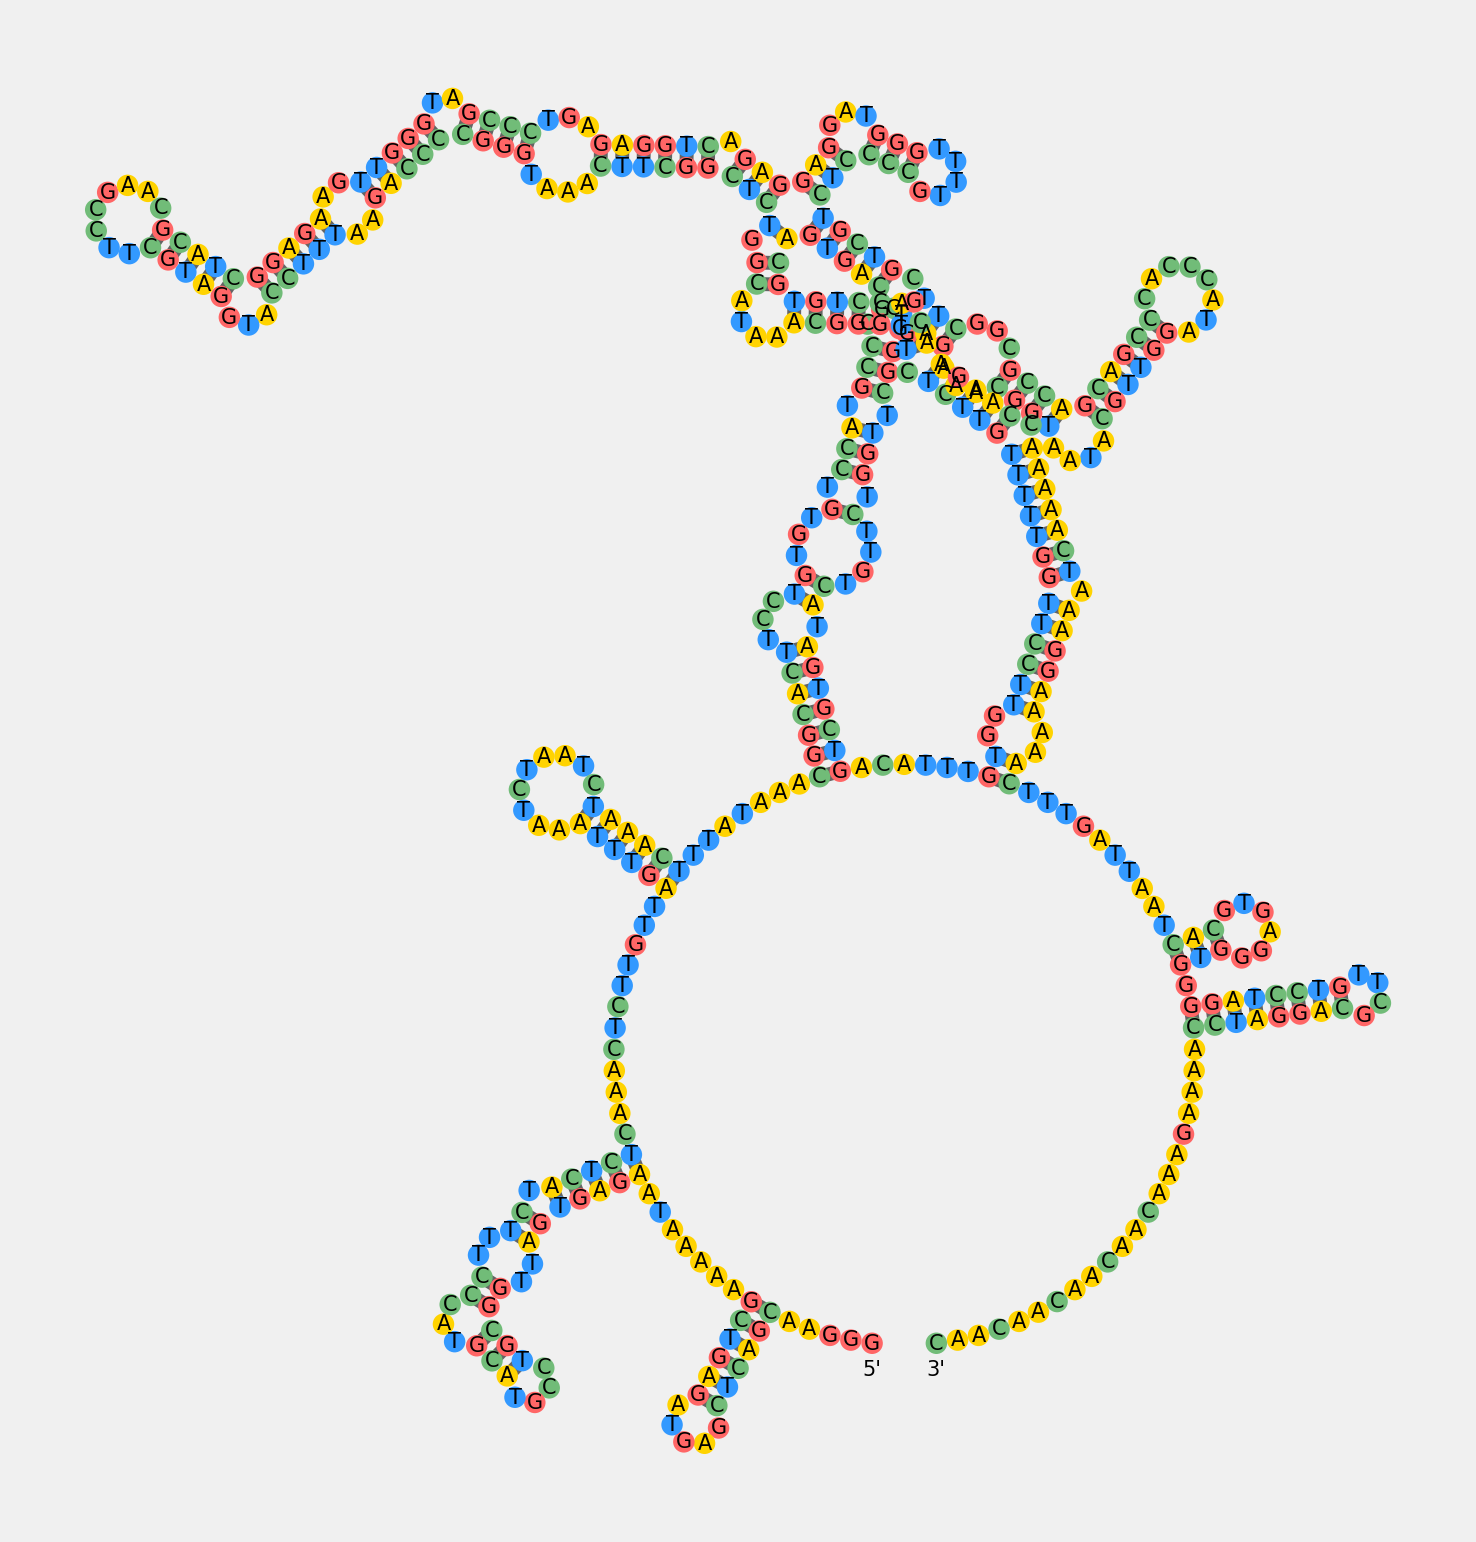

In [23]:
from draw_rna.ipynb_draw import draw_struct
draw_struct(sequence, structure)

In [24]:
from arnie.bpps import bpps
bpps(sequence,package="eternafold")

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00038466],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00026091],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00017595],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00038466, 0.00026091, 0.00017595, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
# Example of saving BPPs to a CSV file
import pandas as pd

bpps_data = bpps(sequence, package="eternafold")
bpps_df = pd.DataFrame(bpps_data)
bpps_df.to_csv('bpps_data.csv')

In [26]:
"""
This script calculates base pair probabilities (BPPs) for a given RNA sequence.
"""

from arnie.bpps import bpps

def calculate_bpps(sequence):
    """
    Calculate BPPs for a given RNA sequence.
    
    Args:
        sequence (str): The RNA sequence.
        
    Returns:
        dict: A dictionary containing BPPs.
    """
    return bpps(sequence, package="eternafold")

# Usage
bpps_data = calculate_bpps(sequence)

bpps_data


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00038466],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00026091],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00017595],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00038466, 0.00026091, 0.00017595, ..., 0.        , 0.        ,
        0.        ]])

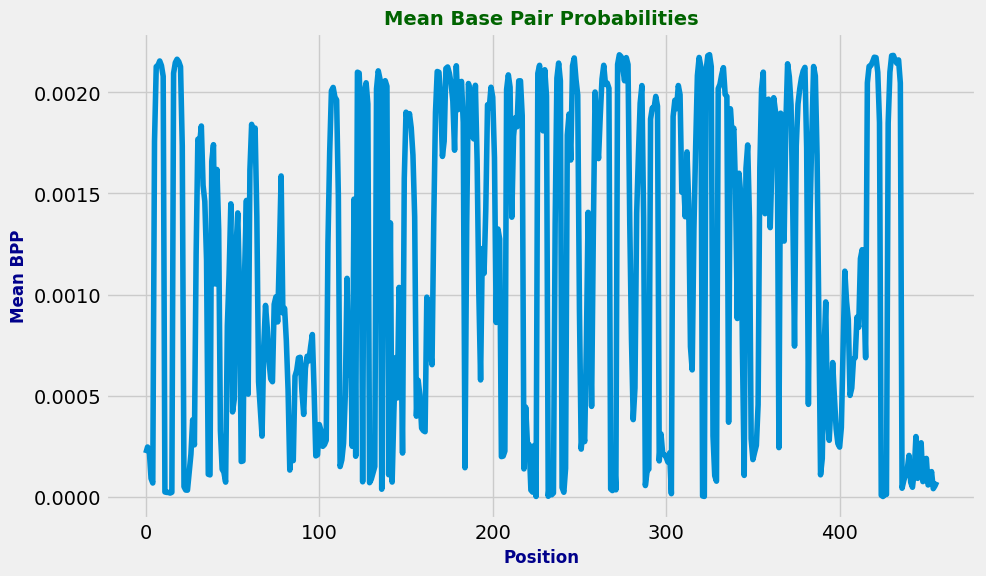

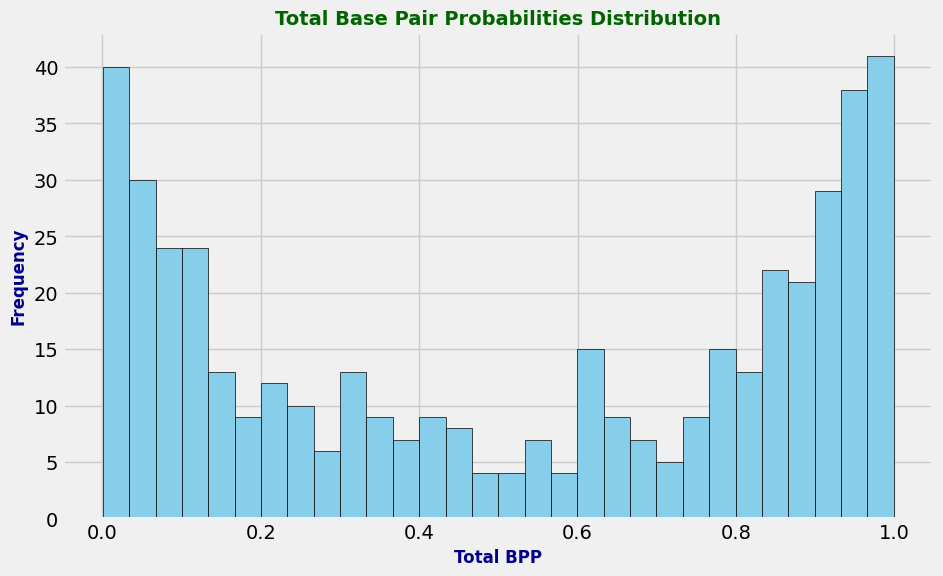

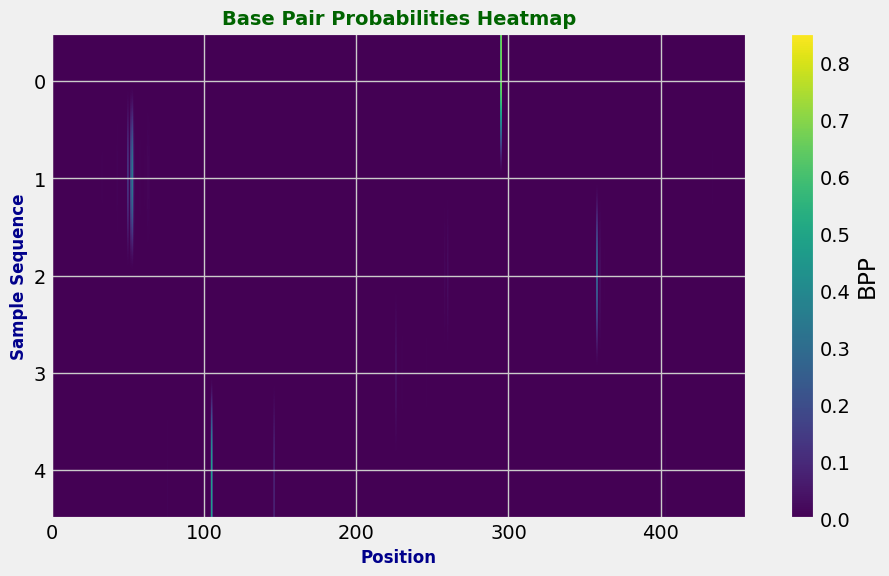

In [27]:
# Drop columns with NaN values (if any)
bpps_df_cleaned = bpps_df.dropna(axis=1, how='any')

# Calculate Mean BPPs for Each Position
mean_bpps = bpps_df_cleaned.mean()

# Plot Mean BPPs
plt.figure(figsize=(10, 6))
plt.plot(mean_bpps)
plt.title('Mean Base Pair Probabilities', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Mean BPP', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Mean Base Pair Probabilities.png')
plt.show()

# Calculate Total BPP for Each Sequence
total_bpps = bpps_df_cleaned.sum(axis=1)

# 4. Plot Total BPP Distribution
plt.figure(figsize=(10, 6))
plt.hist(total_bpps, bins=30, color='skyblue', edgecolor='black')
plt.title('Total Base Pair Probabilities Distribution', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Total BPP', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Frequency', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Total Base Pair Probabilities Distribution.png')
plt.show()


# Visualize BPPs Heatmap for a Few Sequences
sample_sequences = bpps_df.sample(n=5, random_state=42)

plt.figure(figsize=(10, 6))
plt.imshow(sample_sequences.values, cmap='viridis', aspect='auto')
plt.colorbar(label='BPP')
plt.title('Base Pair Probabilities Heatmap', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Position', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Sample Sequence', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Base Pair Probabilities Heatmap.png')
plt.show()

In [28]:
import plotly.graph_objects as go

# Define the performance measures
labels = ['Sensitivity', 'Positive Predictive Value (PPV)', 'Matthews Correlation Coefficient (MCC)', 'F-measure (F1 Score)']
scores = [sensitivity_score, ppv_score, mcc_score, f_measure_score]

# Create a horizontal bar plot
fig = go.Figure(data=[go.Bar(
    y=labels,
    x=scores,
    orientation='h',
    marker=dict(color=['blue', 'green', 'red', 'purple'])
)])

fig.update_layout(
    title='Performance Measures',
    xaxis_title='Score',
    yaxis_title='Metric',
    yaxis=dict(autorange='reversed')
)

fig.show()

In [29]:
submission_data = pd.read_csv('/kaggle/input/stanford-ribonanza-rna-folding/sample_submission.csv')
submission_data.head()

,id,reactivity_DMS_MaP,reactivity_2A3_MaP
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [30]:
submission_df = pd.DataFrame(submission_data)

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [31]:
submission_df

,id,reactivity_DMS_MaP,reactivity_2A3_MaP
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
269796666,269796666,0,0
269796667,269796667,0,0
269796668,269796668,0,0
269796669,269796669,0,0
